# <center> Machine Learning II (DSCI 364)
## <center> Becamex Business School
##### <center> Kang Seung Won (kwon.kang@eiu.edu.vn)
---

## NPNG in DSCI 364

- #### No Pain No Gain (NPNG) $\rightarrow$ `"Pain Makes Gain"`
- #### No Practice No Gain (NPNG) $\rightarrow$ `"Practice Makes Perfect"`

---

# Gradient Descent
- Big Dipper (Bắc Đẩu) (https://www.space.com/27758-big-dipper.html)

- **Gradient:**
    - Change in the value of a quantity.
    - The degree of steepness of a graph at any point, simplpy, **SLOPE at any point.**
- **Descent:**
    - An action of moving downward, dropping, or falling
    - Antonym: ascent $\rightarrow$ rise, climb

![Gradient Descent](gd.png)

by Gemini


### Cost Function for Regression

- **Linear Regression:**

    - $\hat{\beta} = (X^{'}X)^{-1}X^{'}y \Rightarrow$ Cost Function (Mean Squared Error (MSE)): $L = \frac{1}{n}\sum(y_i - x_i\hat{\beta_i})^2$

    - **Gradient** is **Derivative** of the Cost function w.r.t. $\hat{\beta_i} \text{ or } \hat{y}_i$

$$
\begin{align*}
    L &= \frac{1}{n}\sum(y_i - \hat{y}_i)^2 = \frac{1}{n}\sum(y_i-\hat{\beta_i} x_i)^2\\
    \frac{\partial L}{\partial \beta_i} &= -\frac{2}{n}\sum x_i(y_i - \hat{\beta_i} x_i)\\
    \frac{\partial L}{\partial \hat{y}_i} &= - \frac{2}{2n} \sum_{i=1}^{n} x_i(y_i - \hat{y}_i)=- \frac{1}{n} \sum_{i=1}^{n} x_i(y_i - \hat{y}_i)
\end{align*}
$$


### Gradient Descent for Optimization

To **minimize** the Cost(Loss) function, we **update** the model parameters using **gradient descent**.


Tưởng tượng em đang đứng trên một ngọn núi trong sương mù:

Em không thấy đáy núi ở đâu

Nhưng em:

bước thử 1 bước

thấy thấp hơn → đi tiếp

thấy cao hơn → quay lại

👉 Cuối cùng em sẽ đi xuống chỗ thấp nhất

📌 Gradient Descent = cách đi xuống núi đó

#### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #vẽ biểu đồ
import matplotlib as mpl #Chỉnh cấu hình toàn cục (font, size, style…)
import seaborn as sns #draw graph for analysis

sns.set_style("whitegrid") #Đặt style mặc định cho toàn bộ biểu đồ (nền trắng + lưới xám nhẹ)
mpl.rcParams['figure.figsize'] = (12, 6) #Thiết lập kích thước figure mặc định (Rộng 12 inch, cao 16 inch)

import warnings
warnings.filterwarnings("ignore")


### Update Rules

- Let $\beta_i = w_i$ (weights) and $b$ (bias) following Machine Learning customs.
- Iteratively update weights and bias to minimize the loss:

$$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b}$$

   - $\alpha$ is the **learning rate** (step size)
   - $\frac{\partial L}{\partial w}$ is the **gradient** of the cost with respect to weights
   - $\frac{\partial L}{\partial b}$ is the **gradient** of the cost with respect to bias


### Stochastic Gradient Descent (SDG) and Mini-batch Gradient Descent (MBGD)
- SDG: Randomly select a sample from the dataset and update the parameters
- MBGD: Randomly select a subset of the dataset and update the parameters


In [ ]:
##dữ liệu giả (synthetic data)
X, y = make_regression(n_samples=10000, n_features=1, noise=20, random_state=123)
# 10000 quan sát , 1 biến độc lập , độ nhiễu , cố định seed ngẫu nhiên

In [ ]:
from sklearn.preprocessing import StandardScaler
# Giá trị này thấp hay cao so với mặt bằng chung?

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
# cái dùng để học và áp dụng X-test

#Huấn luyện Linear Regression bằng Mini-Batch Gradient Descent

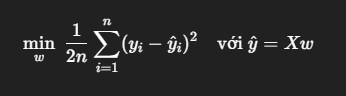

| Grab     | Hồi quy    |
| -------- | ---------- |
| 20.000   | bias (w₀)  |
| 5.000/km | hệ số (w₁) |
| số km    | x          |

Tiền = 20.000 (mở cửa) + 5.000 × số km

In [ ]:
def mini_batch_gd(X, y, lr=0.01, epochs=1000, batch_size=100, tol=1e-5):
  # số vòng học tối đa (epochs), batch_size : kích thước mini-batch, ngưỡng dừng khi gradient nhỏ tol

# X giá trị đầu vào (dùng để dự đoán)
# batch_size là số DỮ LIỆU trong 1 nhóm

    rng = np.random.default_rng() # Dùng để xáo trộn dữ liệu mỗi epoch

    X = np.c_[np.ones(X.shape[0]), X]   #Thêm cột 1 là để học được hệ số “cộng thêm” (bias),

    w = np.zeros(X.shape[1]) #Bắt đầu học từ “chưa biết gì”

    for epoch in range(epochs): #epochs = số lần cho phép học tối đa
        idx = rng.permutation(len(y)) #Đảo thứ tự dữ liệu , tránh overfit thứ tự /mỗi vòng học → trộn bài lại
        Xs, ys = X[idx], y[idx]

        for i in range(0, len(y), batch_size): #Chia dữ liệu thành từng nhóm nhỏ
            Xb, yb = Xs[i:i+batch_size], ys[i:i+batch_size] #Lấy từ vị trí i đến trước i + batch_size
            grad = (Xb.T @ (Xb @ w - yb)) / len(yb) #gradient (hướng sửa sai)

            w -= lr * grad #lr nhỏ → sửa từ từ , đoán sai → rút kinh nghiệm → sửa lại

        if np.linalg.norm(grad) < tol: # Nếu rất nhỏ → sửa tiếp cũng không cải thiện mấy
        # Độ lớn của vector grad
            print(f"Converged at epoch {epoch}")
            break

    return w

Học = xáo trộn dữ liệu → chia nhỏ → đoán → sai → sửa → lặp lại → dừng khi gần đúng.

Hàm mini_batch_gd dùng để:

Tìm mối quan hệ giữa X và y
bằng cách:

chia dữ liệu thành những nhóm nhỏ (mini-batch)

đoán y từ X

so sánh với y thật

sửa lại cách đoán

lặp đi lặp lại cho đến khi đoán tốt

=》 #CÁCH HỌC CỦA MINI BATCH

 Máy:  w -= lr * grad

Đoán y

Tính xem sai bao nhiêu

Sửa trọng số w từng chút một

Lặp lại nhiều lần

📌 Đây gọi là học dần (iterative learning)


In [ ]:
print(mini_batch_gd(X_scaled, y))

[ 0.98841593 90.92045912]


In [ ]:
import pingouin as pg
pg.linear_regression(X_scaled, y)


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.021354,0.201784,5.061628,4.230923e-07,0.953086,0.953081,0.625817,1.416891
1,x1,90.940104,0.201784,450.681078,0.000000e+00,0.953086,0.953081,90.544567,91.335640


## Advantages of Gradient Descent (Why widely used in Machine Learning)

https://www.network-graphics.com/local-and-global-maximum-and-minimum-points/


- No need to use all data points
- No need to know the exact form of derivative of the cost function
- still we can find the gradient (sloping or moving of cost function)
- Example
$$ Cost = (1-x_1)^2 + (x_1 - x_0^2)^2$$

x₁, x₂ GIỐNG HỆT w  : dùng để điều chỉnh sao cho gần y nhất (y riel )

In [ ]:
# Gradient Descent
from scipy.optimize import approx_fprime

x_gd = np.array([1.3, 0.7]) # x₁, x₂ ở đây chỉ là tọa độ
loss = lambda x: (1-x[0])**2 + (x[1] - x[0]**2)**2

gradient = approx_fprime(x_gd, loss)
# Tăng x₁ một tí xíu ,xem loss tăng hay giảm


print(gradient)


[ 5.74800013 -1.97999999]


x1 = 1.3 => 5.7 x1 mà tăng lên xíu loss tăng nhanh
x2 = 0.7 => loss GIẢM

# Classification

Dùng để TẠO DỮ LIỆU GIẢ cho bài toán PHÂN LOẠI
(ví dụ: đậu / rớt, có bệnh / không bệnh, spam / không spam)


In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=123)

| Thành phần         | Nghĩa dễ hiểu                                       |
| ------------------ | --------------------------------------------------- |
| `X`                | Dữ liệu đầu vào (100 điểm, mỗi điểm có 2 số x₁, x₂) |
| `y`                | Đáp án đúng (0 hoặc 1)                              |
| `n_samples=100`    | Tạo 100 điểm dữ liệu                                |
| `n_features=2`     | Mỗi điểm có 2 đặc điểm                              |
| `n_informative=2`  | Cả 2 đặc điểm đều quan trọng                        |
| `n_redundant=0`    | Không có đặc điểm thừa                              |
| `n_classes=2`      | Chia thành 2 nhóm (0 / 1)                           |
| `random_state=123` | Cố định dữ liệu, chạy lại không đổi                 |


In [ ]:
X = X[:, 0] #Lấy CỘT ĐẦU TIÊN của X, bỏ các cột còn lại
 #: → lấy tất cả các dòng    0 → lấy cột số 0 (cột đầu tiên)

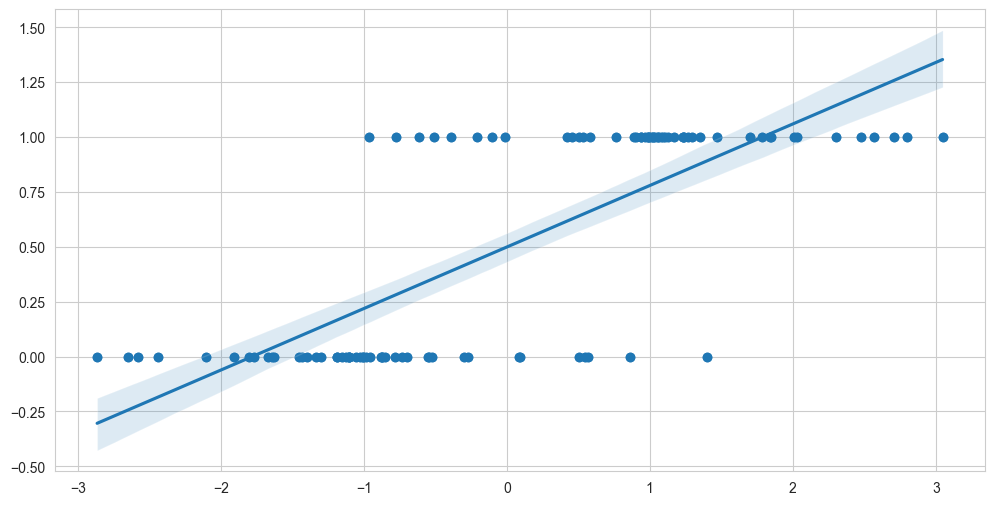

In [ ]:
plt.scatter(X, y);
sns.regplot(x=X, y=y);

# X = điểm bài kiểm tra
# y = kết quả thật

X càng lớn → càng dễ là y = 1

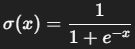

In [ ]:
sigmoid = lambda x: 1 / (1+np.exp(-x))

Nhập một số x → trả ra một số nằm giữa 0 và 1

sigmoid(10)   ≈ 0.999

sigmoid(0)    = 0.5

sigmoid(-10)  ≈ 0.000


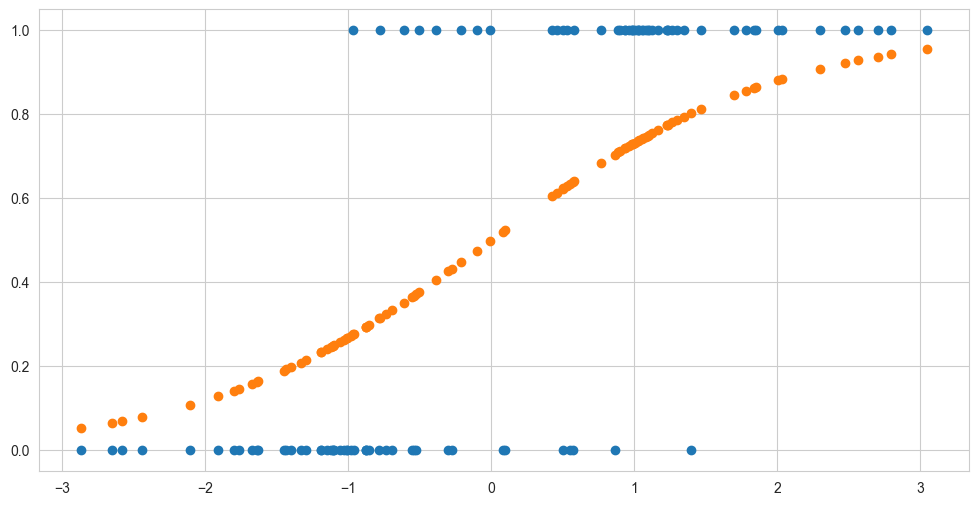

In [ ]:
plt.scatter(X, y);
plt.scatter(X, sigmoid(X));

# X = điểm bài kiểm tra
# y = kết quả thật

Nếu X = 2 và sigmoid(X) ≈ 0.8 thì hoàn toàn có thể nói: “khả năng đậu là 80%”.

Log(odds) = $\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$

In [ ]:
log_odds = np.log(y / (1-y))

In [ ]:
log_odds, y

(array([ inf, -inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf,
         inf, -inf, -inf, -inf,  inf,  inf,  inf, -inf,  inf, -inf,  inf,
         inf,  inf, -inf,  inf, -inf, -inf, -inf, -inf, -inf, -inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf, -inf,  inf, -inf,  inf,  inf,
         inf, -inf,  inf,  inf, -inf, -inf, -inf,  inf, -inf, -inf, -inf,
        -inf,  inf, -inf, -inf,  inf,  inf, -inf, -inf,  inf, -inf,  inf,
        -inf,  inf,  inf,  inf, -inf, -inf, -inf,  inf, -inf,  inf, -inf,
        -inf, -inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf,  inf,  inf,
        -inf,  inf, -inf, -inf,  inf,  inf,  inf,  inf, -inf, -inf,  inf,
         inf]),
 array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1,


---
#### Maximum Likelihood Estimation (MLE) : chỉnh cách đoán sao cho những gì đã xảy ra trở nên “hợp lý nhất”

- We model each label $y_i$ as an independent **Bernoulli** random variable with success probability $\pi_i = \hat{y}_i$:

$$p(y_i | x_i) = \hat{y}_i^{y_i} \, (1 - \hat{y}_i)^{1 - y_i}$$

https://www.sciencedirect.com/topics/mathematics/bernoulli-distribution#:~:text=An%20example%20of%20a%20Bernoulli,X%20is%20set%20to%201.

- The likelihood of the entire dataset is the product over all $N$ samples:

$$p(y | x) = \prod_{i=1}^{N} \hat{y}_i^{y_i} \, (1 - \hat{y}_i)^{1 - y_i}$$

- Taking the logarithm:

$$
\begin{align*}
\mathcal{L} = \log p(y | x) &= \sum_{i=1}^{N} \left[ -y_i \log \hat{y}_i - (1 - y_i) \log (1 - \hat{y}_i) \right] \\
&= -\sum_{i=1}^{N} L(y_i, \hat{y}_i)
\end{align*}
$$


In [ ]:
from scipy.optimize import minimize

X_b = np.c_[np.ones(len(X)), X]

def neg_log_likelihood(w):
    z = X_b @ w
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1-y) * np.log(1-p))

result = minimize(neg_log_likelihood, np.zeros(2))
weights = result.x

weights



array([0.03019763, 2.23468246])

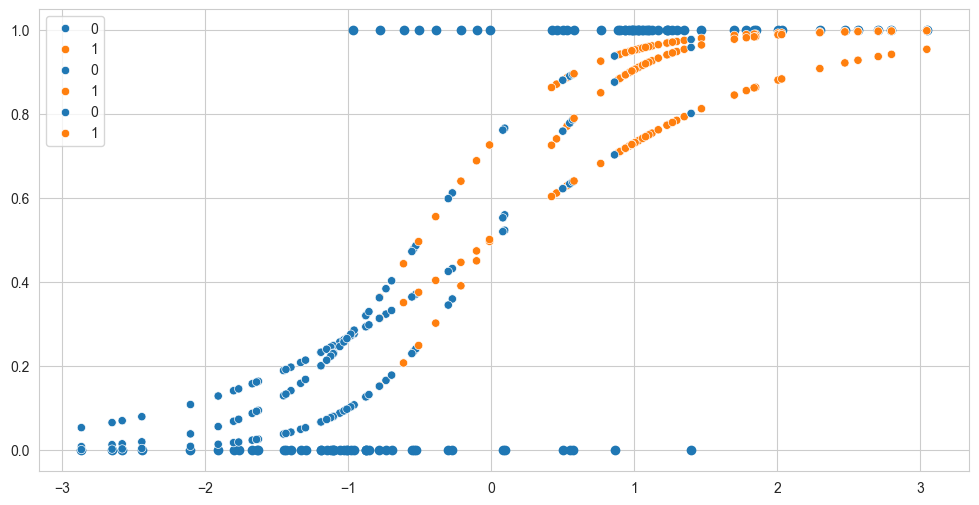

In [ ]:
plt.scatter(X, y);
sns.scatterplot(x=X, y=sigmoid(X), hue=y);
sns.scatterplot(x=X, y=sigmoid(2*X+1), hue=y);
sns.scatterplot(x=X, y=sigmoid(2.23468246*X+0.03019763), hue=y);

In [ ]:
import pingouin as pg
print(pg.logistic_regression(X, y))

       names      coef        se         z          pval  CI[2.5%]  CI[97.5%]
0  Intercept  0.030198  0.333586  0.090525  9.278704e-01 -0.623618   0.684014
1         x1  2.234676  0.396663  5.633687  1.763970e-08  1.457230   3.012121



---
# Cost Function for Classification Using Gradient Descent: Entropy

#### What is Entropy from `Theory of Information' :
- **Entropy** measures the **uncertainty** or **randomness** in a probability distribution.
- It answers the question: *"How surprised would we be, on average, by outcomes from this distribution?"*

#### Intuition

- **Low Entropy**: Distribution is very certain (e.g., P = [0.99, 0.01])
  - We're rarely surprised by the outcome
  - Most of the time we get the same result
  
- **High Entropy**: Distribution is very uncertain (e.g., P = [0.5, 0.5])
  - We're often surprised by the outcome
  - Results are unpredictable

- **Uncertainty** can be defined as the **expected value of the surprise** of the outcomes:

  - **Surprise** is inversely proportional to probability: $\text{Surprise} = \frac{1}{P(x_i)}$
     - High probability events → low surprise
     - Low probability events → high surprise



  - If we use $\frac{1}{P(x_i)}$ as measurement,
    - when $P(x_i) = 1$ then $\frac{1}{P(x_i)} = 1$ (100% Sure), which is against the intuition. It should be zero (no suprise!!!).

### Alternative: **log-transformation** of $\text{Surprise} = \log\left(\frac{1}{P(x_i)}\right) = -\log(P(x_i))$
      


---
#### Remarks: Why **log-transformation**?
- Mathematical simplicity: multiplication → addition, and division → subtraction, so it transforms non-linear relationship to linear one.
- Derivative is simple: $\frac{d}{dx} \log(x) = \frac{1}{x}$
- Monotonicity: $\log(x)$ is monotonically increasing, so it preserves the order of the original distribution


---
## **Entropy** is the expected value of surprise:

$$
H(P) = \sum_{i=1}^{n} P(x_i) \cdot (-\log(P(x_i))) = -\sum_{i=1}^{n} P(x_i) \log(P(x_i))
$$

- Note: Expected Value: $E(X) = \sum_{i=1}^{n} P(x_i) \cdot x_i$  


### Cross Entropy: Binary Classification Case

In binary classification, we consider two probability distributions of true $y$ and predicted $\hat{y}$:

- **P**: The true distribution (from labelling)
  -   $P(y=1) = y_{true}$ (where $y_{true}$ is 1 if the true label is 1, and 0 otherwise)
  -   $P(y=0) = 1 - y_{true}$

- **Q**: The predicted distribution (from model)
    -   $Q(y=1) = \hat{y}$ (the model's predicted probability for class 1)
    -   $Q(y=0) = 1 - \hat{y}$ (the model's predicted probability for class 0)



---
## Cross-Entropy Cost

$$
H(P, Q)
=
\sum_{i=1}^{n} P(x_i)\,\bigl(-\log Q(x_i)\bigr)
=
-\sum_{i=1}^{n} P(x_i)\,\log Q(x_i)
$$

- **Entropy** asks: *“How uncertain is distribution \(P\) about outcomes drawn from \(P\) itself?”*
- **Cross-entropy** asks: *“How uncertain is distribution \(P\) when using predictions from \(Q\)?”*

## Binary Classification Interpretation

In binary classification:


- The model output $\hat{y}$ from a sigmoid function:

$$
\hat{y} = P(y = 1 \mid x),
\qquad
1 - \hat{y} = P(y = 0 \mid x)
$$


### Cost Function

> Single Sample

For one training example with true label $y$ and prediction $\hat{y}$:

$$
L(y, \hat{y})
=
-\bigl[
y \log(\hat{y})
+
(1 - y)\log(1 - \hat{y})
\bigr]
$$

> Entire Dataset

For a dataset with $m$ samples:

$$
J(w, b)
=
-\frac{1}{m}
\sum_{i=1}^{m}
\Bigl[
y^{(i)} \log\bigl(\hat{y}^{(i)}\bigr)
+
\bigl(1 - y^{(i)}\bigr)
\log\bigl(1 - \hat{y}^{(i)}\bigr)
\Bigr]
$$


> $y = 1$, the loss is:

$$
-\log(\hat{y})
$$

> $y = 0$, the loss is:

$$
-\log(1 - \hat{y})
$$



---
#### Remarks: Why not Mean Squared Error (MSE) in classification?
- Can be used but poor performance, especially with neural networks and deep learning.
- Why?
    - **MSE** penalizes errors quadratically.
        - When the model is confidently wrong (e.g., true label is 1, but prediction is 0.01), MSE can still yield a relatively small loss if the difference is squared, not providing a strong enough signal for the model to correct its prediction.
        - It treats all errors equally regardless of how confident the model is in its wrong prediction.

    - **Cross-Entropy** loss, on the other hand, heavily penalizes confident wrong predictions.
        - The $-\log$ function is convex and grows rapidly as its argument approaches 0 (correct probability approaches 0).
        - If $y=1$ but $\hat{y}$ is small (confident wrong prediction): $-\log(\hat{y})$ becomes very large → heavy penalty.
        - If $y=0$ but $\hat{y}$ is large: $-\log(1-\hat{y})$ becomes very large → heavy penalty.
        - If prediction is correct and confident ($\hat{y} \approx 1$ for $y=1$, or $\hat{y} \approx 0$ for $y=0$): loss approaches 0.


True y=1, and $\hat{y}$ from 1 .... 0 $\Rightarrow -log(\hat{y})$

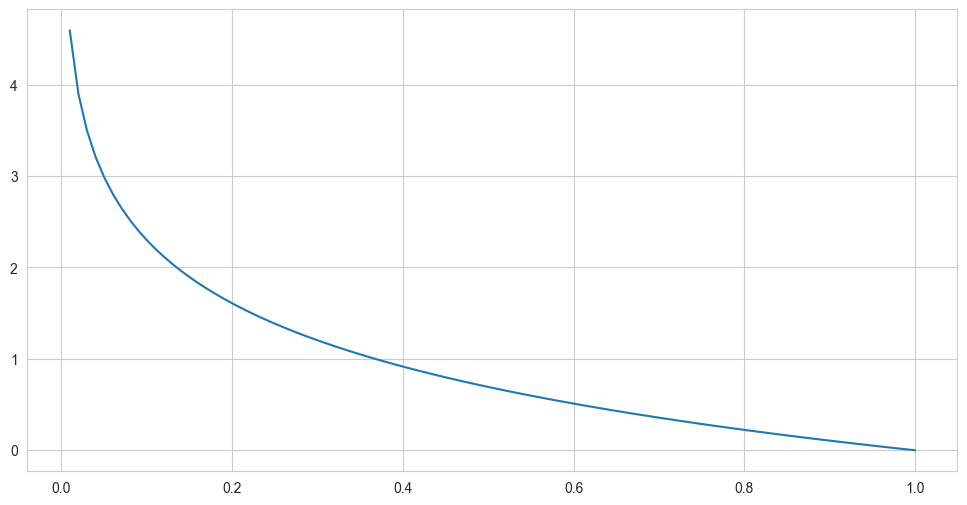

In [ ]:
x = np.linspace(0, 1, 100)
# loss = - np.log(x)
plt.plot(x, - np.log(x));

True y=0, and $\hat{y}$ from 1 .... 0 $\Rightarrow -log(1-\hat{y})$

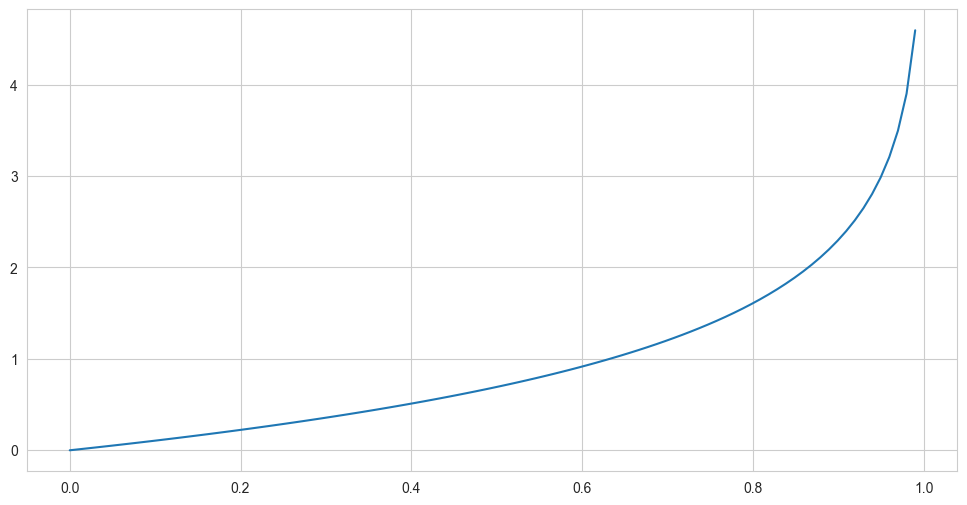

In [ ]:
plt.plot(x, -np.log(1-x));




| True label | Model output | MSE loss = (y − ŷ)² | Cross-Entropy loss = −[y log ŷ + (1−y) log(1−ŷ)] |
|---|---|---|---|
| y = 1 | ŷ = 0.99 | (0.01)² = 0.0001 | −log(0.99) ≈ 0.01 |
| y = 1 | ŷ = 0.01 | (0.99)² ≈ 0.98 | −log(0.01) ≈ 4.6 ← huge! |
| y = 0 | ŷ = 0.99 | (0.01)² = 0.0001 | −log(0.01) ≈ 4.6 ← huge! |
| y = 0 | ŷ = 0.01 | (0.99)² ≈ 0.98 | −log(0.99) ≈ 0.01 |

- Cross-entropy punishes confident wrong predictions exponentially harder. (https://e.vnexpress.net/news/perspectives/huge-new-penalties-justified-will-help-improve-vietnam-traffic-order-4836935.html)
- MSE measures distance, cross-entropy measures how wrong your probability distribution is.
- This characteristic makes it more suitable for classification tasks where we want the model to be confident in its correct predictions and heavily penalized for confident incorrect predictions.


---
### Sigmoid Function Derivative

The **sigmoid function** is defined as: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- Goal: Find $\frac{d\sigma}{dz}$
- Rewrite sigmoid: $\sigma(z) = (1 + e^{-z})^{-1}$
- $\frac{d\sigma}{dz} = -(1 + e^{-z})^{-2} \cdot \frac{d}{dz}(1 + e^{-z}) = -(1 + e^{-z})^{-2} \cdot (-e^{-z}) = \frac{e^{-z}}{(1 + e^{-z})^2}$

$$
\begin{align*}
\frac{d\sigma}{dz} &= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} \\
&= \frac{1}{1 + e^{-z}} \cdot \left(1 - \frac{1}{1 + e^{-z}}\right) \\
&= \sigma(z) \cdot (1 - \sigma(z))
\end{align*}
$$

---

### Binary Cross-Entropy Gradient

- For binary classification with sigmoid activation: $\hat{y} = \sigma(z)$ where $z = w^T x + b$
- Binary Cross-Entropy Loss: $J = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$
- Goal: Find $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ using chain rule ($\frac{\partial J}{\partial w}=\frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}$).


   - Compute $\frac{\partial J}{\partial \hat{y}}$
$$
\begin{align*}
\frac{\partial J}{\partial \hat{y}} &= -\left[\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\right] \\
&= -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} \\
&= \frac{-y(1-\hat{y}) + (1-y)\hat{y}}{\hat{y}(1-\hat{y})} \\
&= \frac{-y + y\hat{y} + \hat{y} - y\hat{y}}{\hat{y}(1-\hat{y})} \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}
\end{align*}
$$

   - Compute $\frac{\partial \hat{y}}{\partial z}$
      - From sigmoid derivative: $\frac{\partial \hat{y}}{\partial z} = \hat{y}(1 - \hat{y})$

   - Combine these: $\frac{\partial J}{\partial z}$

$$
\begin{align*}
\frac{\partial J}{\partial z} &= \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \cdot \hat{y}(1-\hat{y}) \\
&= \hat{y} - y
\end{align*}
$$

   - Compute $\frac{\partial z}{\partial w}$
      - Since $z = w^T x + b$, we have $\frac{\partial z}{\partial w} = x$
         - $\frac{\partial J}{\partial w} = \frac{\partial J}{\partial z} \cdot \frac{\partial z}{\partial w} = (\hat{y} - y) \cdot x$
      - For $m$ samples, averaging: $\boxed{\frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)}$

- Compute $\frac{\partial J}{\partial b}$
   - Since $z = w^T x + b$, we have $\frac{\partial z}{\partial b} = 1$
      - $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial z} \cdot \frac{\partial z}{\partial b} = (\hat{y} - y) \cdot 1 = \hat{y} - y$

   - For $m$ samples, averaging:
$$\boxed{\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})}$$



## NPNG

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [ ]:
def gradient_descent(X, y, n_iter=10000, learning_rate=0.1, tol=1e-5):
    X = np.c_[np.ones(len(X)), X]
    w = np.zeros(X.shape[1])
    N = len(X)

    for i in range(n_iter):
        z = X @ w
        error = (sigmoid(z)-y)

        dw = (1/N)* (X.T @ error)
        w -= learning_rate * dw

        # Early Stop
        if np.linalg.norm(dw) < tol:
            print(f'Converse at {i}')
            break

    return w


In [ ]:
w = gradient_descent(X_scaled, y)

Converse at 5779


In [ ]:
w

array([0.45337545, 3.89971593, 1.16832768])

In [ ]:
pg.logistic_regression(X_scaled, y)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,0.453554,0.405481,1.118558,0.263329,-0.341174,1.248283
1,x1,3.900375,0.803953,4.851497,0.000001,2.324657,5.476094
2,x2,1.168604,0.423940,2.756530,0.005842,0.337696,1.999511



---
## Multiclass Logistic Regression (Softmax)

**Classification problem with $N > 2$ possible classes.**

- For each class $i$ in 1, $\dots$, $N$, define $z_i$:

$$
z_i = \mathbf{w}_i^T \mathbf{x} + b_i
$$

Choose class $N$ as the **reference class**.  

- Assume the log-odds of class $i$ versus the reference class equals the linear score:

$$
\log \left( \frac{P(Y=i \mid \mathbf{x})}{P(Y=N \mid \mathbf{x})} \right) = z_i,
\qquad i = 1, \dots, N
$$


- Exponentiating both sides gives:

$$
\frac{P(Y=i \mid \mathbf{x})}{P(Y=N \mid \mathbf{x})} = e^{z_i}
$$

- Rearranging:

$$
P(Y=i \mid \mathbf{x}) = P(Y=N \mid \mathbf{x}) \cdot e^{z_i}
$$

- Class probabilities must sum to 1:

$$
\sum_{i=1}^{N} P(Y=i \mid \mathbf{x}) = 1
$$

- Substitute the expression:

$$
\sum_{i=1}^{N} \left[ P(Y=N \mid \mathbf{x}) \cdot e^{z_i} \right] = 1
$$

- Factor out $P(Y=N \mid \mathbf{x})$:

$$
P(Y=N \mid \mathbf{x}) \sum_{i=1}^{N} e^{z_i} = 1
$$


- Solve for the Reference-Class Probability

$$
P(Y=N \mid \mathbf{x}) = \frac{1}{\sum_{i=1}^{N} e^{z_i}}
$$


- Derive the Softmax Formula:

$$
P(Y=i \mid \mathbf{x})
=
P(Y=N \mid \mathbf{x}) \cdot e^{z_i}
=
\frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}},
\qquad i = 1, \dots, N
$$

This is the **softmax function**.

> The index \(j\) in the denominator is used to emphasize that the sum runs over all classes.

## Extension to Multiclass Classification (Categorical Cross-Entropy)

In multiclass classification with $n$ classes:

- **P**: True distribution (one-hot encoded labels)
  - $P(y=c) = 1$ if true class is $c$, else $0$
  - Example: for class 2 out of 3 classes: $[0, 1, 0]$

- **Q**: Predicted distribution (model's probabilities from softmax)
  - $Q(y=c) = \hat{y}_c$ where $\sum_{c=1}^{n} \hat{y}_c = 1$
  - Example: $[0.1, 0.7, 0.2]$

#### Categorical Cross-Entropy Loss

For a **single sample** with true label vector $\mathbf{y}$ and prediction vector $\hat{\mathbf{y}}$:

$$L(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{c=1}^{n} y_c \log(\hat{y}_c)$$

**Why this formula works:**
- Since $\mathbf{y}$ is one-hot encoded, only the term where $y_c = 1$ (true class) survives
- Reduces to: $L = -\log(\hat{y}_{\text{true}})$ → penalizes low probability for the true class

For the **entire dataset** with $m$ samples:

$$J(W, \mathbf{b}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{c=1}^{n} y_c^{(i)} \log(\hat{y}_c^{(i)})$$

**Relationship to binary case:**
- Binary cross-entropy is a special case where $n = 2$
- For $n = 2$: categorical cross-entropy simplifies to binary cross-entropy

#### Example

| True label | Model output (softmax) | Cross-Entropy loss = −log(ŷ_true) |
|---|---|---|
| [1, 0, 0] | [0.95, 0.03, 0.02] | −log(0.95) ≈ 0.051 ← good! |
| [1, 0, 0] | [0.7, 0.2, 0.1] | −log(0.7) ≈ 0.357 |
| [1, 0, 0] | [0.4, 0.4, 0.2] | −log(0.4) ≈ 0.916 |
| [1, 0, 0] | [0.05, 0.9, 0.05] | −log(0.05) ≈ 3.0 ← huge! |
| [0, 1, 0] | [0.1, 0.85, 0.05] | −log(0.85) ≈ 0.163 |
| [0, 1, 0] | [0.33, 0.34, 0.33] | −log(0.34) ≈ 1.08 ← uncertain |
| [0, 1, 0] | [0.6, 0.05, 0.35] | −log(0.05) ≈ 3.0 ← huge! |
| [0, 0, 1] | [0.1, 0.1, 0.8] | −log(0.8) ≈ 0.223 |
| [0, 0, 1] | [0.5, 0.4, 0.1] | −log(0.1) ≈ 2.3 ← large! |


For the case: True label = [1, 0, 0], Predicted = [0.95, 0.03, 0.02]

- $L = -\sum_{c=1}^{3} y_c \log(\hat{y}_c)$
- $L = -(y_1 \log(\hat{y}_1) + y_2 \log(\hat{y}_2) + y_3 \log(\hat{y}_3))$
- $L = -(1 \times \log(0.95) + 0 \times \log(0.03) + 0 \times \log(0.02))$
- $L = -\log(0.95)$. In machine learning, $\log$ typically means natural logarithm (ln or $\log_e$)
- $\ln(0.95) \approx -0.05129$
- Finally: $L = -(-0.05129) = 0.05129 \approx 0.051$

**Key observations:**
- Loss only depends on the probability assigned to the true class
- High confidence in correct class → low loss
- High confidence in wrong class → very high loss (exponentially worse)



---

### Softmax Function Derivative

The **softmax function** for class $i$ is defined as: $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}$

- Let $s_i = \text{softmax}(z_i)$. We need to find $\frac{\partial s_i}{\partial z_j}$ for two cases:

   - Case 1: When $i = j$ (derivative with respect to itself)
      - Apply quotient rule: $\frac{d(a/b)}{dz} = \frac{b \frac{da}{dz} - a \frac{db}{dz}}{b^2}$
$$      
\begin{align*}
\frac{\partial s_i}{\partial z_i} &= \frac{\frac{\partial}{\partial z_i}(e^{z_i}) \cdot \sum_k e^{z_k} - e^{z_i} \cdot \frac{\partial}{\partial z_i}(\sum_k e^{z_k})}{(\sum_k e^{z_k})^2} \\
\frac{\partial}{\partial z_i}(e^{z_i}) &= e^{z_i} \\
\frac{\partial}{\partial z_i}\left(\sum_k e^{z_k}\right) &= e^{z_i} \\
\frac{\partial s_i}{\partial z_i} &= \frac{e^{z_i} \sum_k e^{z_k} - e^{z_i} \cdot e^{z_i}}{(\sum_k e^{z_k})^2}
\end{align*}
$$

   - Factor out $e^{z_i}$: $=\frac{e^{z_i}}{(\sum_k e^{z_k})^2} \left(\sum_k e^{z_k} - e^{z_i}\right)$
   - Simplify: $= \frac{e^{z_i}}{\sum_k e^{z_k}} \cdot \frac{\sum_k e^{z_k} - e^{z_i}}{\sum_k e^{z_k}}$
   - Finally,
$$= s_i \cdot (1 - s_i)$$

- When $i \neq j$ (derivative with respect to another class)
   - Apply quotient rule (numerator doesn't depend on $z_j$) $\frac{\partial s_i}{\partial z_j} = \frac{0 \cdot \sum_k e^{z_k} - e^{z_i} \cdot e^{z_j}}{(\sum_k e^{z_k})^2}$
   - Simplify:
$$
\begin{align*}
\frac{\partial s_i}{\partial z_j} &= -\frac{e^{z_i} \cdot e^{z_j}}{(\sum_k e^{z_k})^2} \\
&= -\frac{e^{z_i}}{\sum_k e^{z_k}} \cdot \frac{e^{z_j}}{\sum_k e^{z_k}} \\
&= -s_i \cdot s_j
\end{align*}
$$

   - Result:
$$\boxed{\frac{\partial s_i}{\partial z_j} = \begin{cases}
s_i(1 - s_i) & \text{if } i = j \\
-s_i \cdot s_j & \text{if } i \neq j
\end{cases}}$$

---
### Softmax Cross-Entropy Gradient

- Multiclass classification with softmax activation:
$$
\hat{\mathbf{y}} = \text{softmax}(\mathbf{z}),
\qquad
\mathbf{z} = W^T \mathbf{x} + \mathbf{b}
$$

- Multiclass cross-entropy loss (single sample):
$$
J = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

- Goal: compute the gradient
$$
\frac{\partial J}{\partial W}
=
\frac{\partial J}{\partial \hat{\mathbf{y}}}
\cdot
\frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{z}}
\cdot
\frac{\partial \mathbf{z}}{\partial W}
$$


- Derivative of the loss w.r.t. predictions

$$
\frac{\partial J}{\partial \hat{y}_i}
=
-\frac{y_i}{\hat{y}_i}
$$

- Apply the chain rule

$$
\frac{\partial J}{\partial z_j}
=
\sum_{i=1}^{n}
\frac{\partial J}{\partial \hat{y}_i}
\cdot
\frac{\partial \hat{y}_i}{\partial z_j}
$$

- Substitute the derivative:

$$
=
\sum_{i=1}^{n}
\left(-\frac{y_i}{\hat{y}_i}\right)
\cdot
\frac{\partial \hat{y}_i}{\partial z_j}
$$


- Softmax derivatives

- Recall the softmax derivative:

> When $i = j$:
$$
\frac{\partial \hat{y}_j}{\partial z_j}
=
\hat{y}_j (1 - \hat{y}_j)
$$

> When $i \neq j$:
$$
\frac{\partial \hat{y}_i}{\partial z_j}
=
-\hat{y}_i \hat{y}_j
$$

- Split the summation

> Case 1: $i = j$

$$
-\frac{y_j}{\hat{y}_j}
\cdot
\hat{y}_j (1 - \hat{y}_j)
=
-y_j (1 - \hat{y}_j)
=
-y_j + y_j \hat{y}_j
$$

>Case 2: $i \neq j$

$$
\sum_{i \neq j}
\left(-\frac{y_i}{\hat{y}_i}\right)
\cdot
(-\hat{y}_i \hat{y}_j)
=
\sum_{i \neq j} y_i \hat{y}_j
=
\hat{y}_j \sum_{i \neq j} y_i
$$

- Combine terms

$$
\begin{aligned}
\frac{\partial J}{\partial z_j}
&=
-y_j + y_j \hat{y}_j
+ \hat{y}_j \sum_{i \neq j} y_i
\\
&=
-y_j + \hat{y}_j
\left(
y_j + \sum_{i \neq j} y_i
\right)
\end{aligned}
$$

- Use one-hot encoding

> Since $\mathbf{y}$ is one-hot encoded:

$$
y_j + \sum_{i \neq j} y_i = 1
$$

> Substitute:

$$
\frac{\partial J}{\partial z_j}
=
-y_j + \hat{y}_j
$$


- Final Result (Single Sample)

$$
\boxed{
\frac{\partial J}{\partial z_j}
=
\hat{y}_j - y_j
}
$$


- Final Result (Dataset of $m$ samples)

Let $X \in \mathbb{R}^{m \times d}$ and $\mathbf{Y} \in \mathbb{R}^{m \times n}$ be the dataset and the true labels, respectively. Then:

$$
\boxed{
\frac{\partial J}{\partial W}
=
\frac{1}{m}
X^\top
(\hat{\mathbf{Y}} - \mathbf{Y})
}
$$

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=123)

In [ ]:
y

array([2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,

In [ ]:
softmax = lambda z: np.exp(z) / np.sum(np.exp(z))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
def gd_multi(X, y, n_iter=1000, tol = 1e-5, learning_rate=0.1):
    X = np.c_[np.ones(len(X)), X]
    N, d = X.shape
    C = y.shape[1]
    W = np.zeros((d, C))

    for i in range(n_iter):
        Z = X @ W
        Y_pred = softmax(Z)

        dW = (X.T @ (Y_pred - y)) / N
        W -= learning_rate * dW

        if np.linalg.norm(dW) < tol:
            print(f'Early Stop at {i}')
            break

    return W

In [ ]:
print(gd_multi(X, y))

[[ 33.59892022  33.29777324  33.00330654]
 [  1.05272017  -1.1571683    0.07123486]
 [ -1.46776384   2.25162342  -0.62908584]
 [  0.79383997   2.03402473  -2.9804148 ]
 [  6.40962317  -3.93680894  -2.38447195]
 [  0.54558857 -22.30118806  21.45964602]
 [ -2.92027771 -20.18187922  22.83796971]
 [ -0.45453381  -0.11589643   0.51001814]
 [ -1.73611331   0.51104746   1.26806317]
 [  7.07773665   6.91334697 -13.83934597]
 [ -0.29478466   0.6322777   -0.44256945]]


# Activation Functions

![Activation Function](Act.webp)

from https://www.geeksforgeeks.org/machine-learning/activation-functions-neural-networks/

An activation function:
- A function that introduces non-linearity into neural networks. This non-linearity is crucial—without it, even deep networks would function as simple linear models, unable to learn complex patterns.

- Activation functions determine whether a neuron activates based on its weighted inputs and bias, and they enable backpropagation by providing the gradients needed for learning.

Main types of activation functions:
- Sigmoid: Maps outputs to the range (0, 1), often used for binary classification.
$f(x)=\frac{1}{1+e^{-x}}$
    - Derivatives: $    $f'(x)=f(x)(1-f(x))$
- Softmax: Maps outputs to the range (0, 1) and ensures they sum to 1, often used for multi-class classification.
$f(x_i)=\frac{e^{x_i}}{\sum_{j=1}^{n}e^{x_j}}$
- Derivatives: $f'(x_i)=f(x_i)(1-f(x_i))$


- Hyperbolic Tangent (Tanh): Maps outputs to the range (-1, 1), useful for symmetrical activation.
$$
\begin{align}
f(x) &=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \\
&=\frac{2}{1+e^{-2x}} - 1 = 2 \times \text{sigmoid}(2x) - 1
\end{align}
$$

- Derivative:

    - Using the quotient rule for $\tanh(x) = \frac{u}{v}$, where $u = e^x - e^{-x}$ and $v = e^x + e^{-x}$:
    $$ \frac{d}{dx}\tanh(x) = \frac{u'v - uv'}{v^2}$$
    - Where $u' = e^x + e^{-x}$ and $v' = e^x - e^{-x}$.
    - Substituting these into the quotient rule:

$$
\begin{align}
\frac{d}{dx}\tanh(x) &= \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2} \\
&= \frac{(e^x + e^{-x})^2 - (e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
&= 1 - \frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
&= 1 - \left(\frac{e^x - e^{-x}}{e^x + e^{-x}}\right)^2 \\
&= 1 - \tanh^2(x)
\end{align}
$$

**Final Result:**

$$ \boxed{\frac{d}{dx}\tanh(x) = 1 - \tanh^2(x)} $$


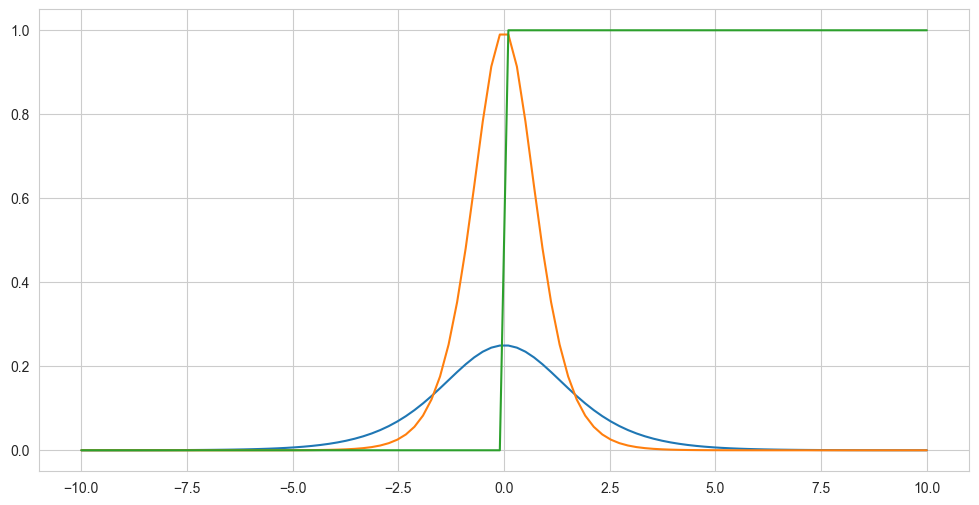

In [ ]:

x = np.linspace(-10, 10, 100)
np.where(x>0, 1.0, 0)

# plt.plot(x, sigmoid(x));
plt.plot(x, sigmoid(x)*(1-sigmoid(x)));
plt.plot(x, (1-np.tanh(x)**2));
plt.plot(x, np.where(x>0, 1.0, 0));

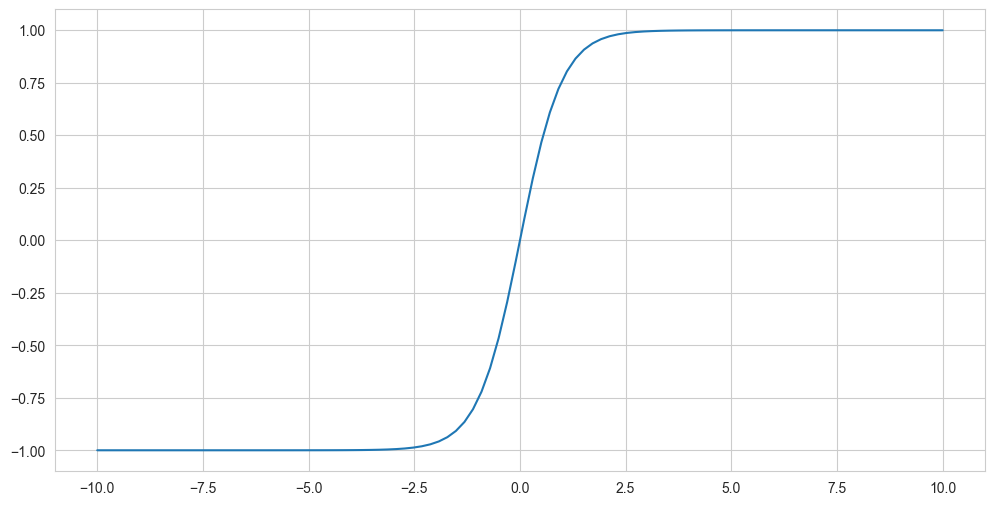

In [ ]:
y_tanh = np.tanh(x)

plt.plot(x, y_tanh);

- ReLU (Rectified Linear Unit): Returns the maximum of 0 and the input, promoting sparsity in the network.
$$ReLu=max(0,x)$$

- Advantage over other Activation: ReLU is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

- Derivative of ReLU:
$$ \boxed{\frac{d}{dx} ReLu = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}}$$


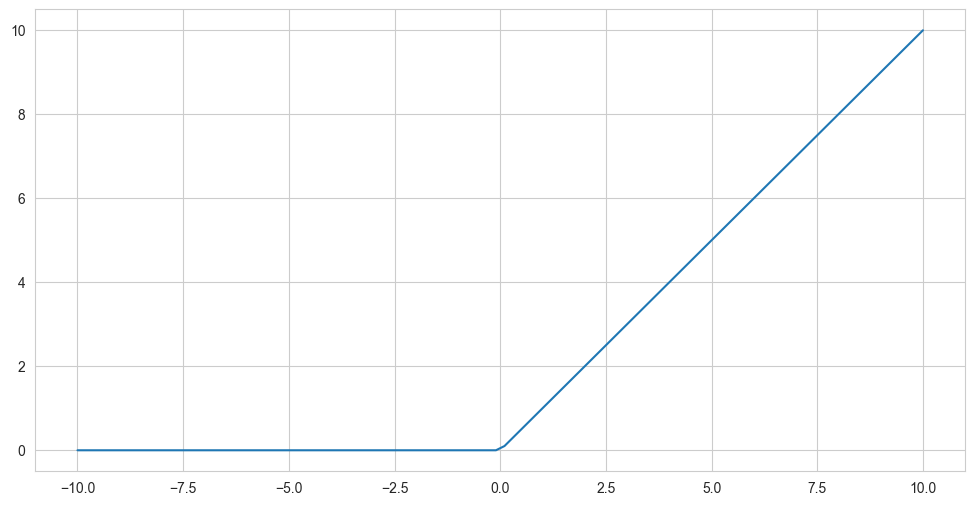

In [ ]:
relu = lambda x: np.maximum(0, x)
y_relu = relu(x)

plt.plot(x, y_relu);

Leaky ReLU: Similar to ReLU but allows a small gradient for negative inputs, preventing vanishing gradients.
$$f(x)=max(\alpha x, x)$$

- Leaky ReLU is similar to ReLU but allows a small negative slope ($\alpha$, 0.01, 0.001, 0.02) instead of zero.
- Solves the “dying ReLU” problem, where neurons get stuck with zero outputs.
- Preferred in some cases for better gradient flow.

Derivative of Leaky ReLU:
$$\boxed{\frac{d}{dx} \text{Leaky ReLu} = \begin{cases} 1 & \text{if } x > 0 \\ \alpha & \text{if } x \leq 0 \end{cases}}$$
